In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def loadDataSet(fileName):
    """
    函数说明:加载数据
    Parameters:
        fileName - 文件名
    Returns:
        xArr - x数据集
        yArr - y数据集
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-12
    """
 
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr
 
def plotDataSet():
    """
    函数说明:绘制数据集
    Parameters:
        无
    Returns:
        无
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-12
    """
    xArr, yArr = loadDataSet('ex0.txt')                                    #加载数据集
    n = len(xArr)                                                        #数据个数
    xcord = []; ycord = []                                                #样本点
    for i in range(n):                                                   
        xcord.append(xArr[i][1]); ycord.append(yArr[i])                    #样本点
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord, ycord, s = 20, c = 'blue',alpha = .5)                #绘制样本点
    plt.title('DataSet')                                                #绘制title
    plt.xlabel('X')
    plt.show()
 


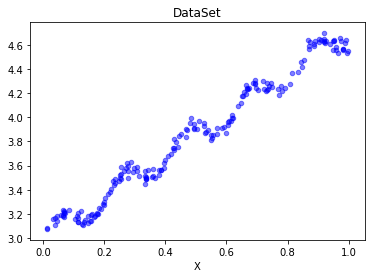

In [8]:
plotDataSet()

通过可视化数据，我们可以看到数据的分布情况。接下来，让我们根据上文中推导的回归系数计算方法，求出回归系数向量，并根据回归系数向量绘制回归曲线，编写代码如下：



In [13]:
def standRegres(xArr,yArr):
    """
    函数说明:计算回归系数w
    Parameters:
        xArr - x数据集
        yArr - y数据集
    Returns:
        ws - 回归系数
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-12
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T * xMat                            #根据文中推导的公示计算回归系数
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws
def plotRegression():
    """
    函数说明:绘制回归曲线和数据点
    Parameters:
        无
    Returns:
        无
    Website:
        https://www.cuijiahua.com/
    Modify:
        2017-11-12
    """
    xArr, yArr = loadDataSet('ex0.txt')                                    #加载数据集
    ws = standRegres(xArr, yArr)                                        #计算回归系数
    xMat = np.mat(xArr)                                                    #创建xMat矩阵
    yMat = np.mat(yArr)                                                    #创建yMat矩阵
    xCopy = xMat.copy()                                                    #深拷贝xMat矩阵
    xCopy.sort(0)                                                        #排序
    yHat = xCopy * ws                                                     #计算对应的y值
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.plot(xCopy[:, 1], yHat, c = 'red')                                #绘制回归曲线
    ax.scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue',alpha = .5)                #绘制样本点
    plt.title('DataSet')                                                #绘制title
    plt.xlabel('X')
    plt.show()
 


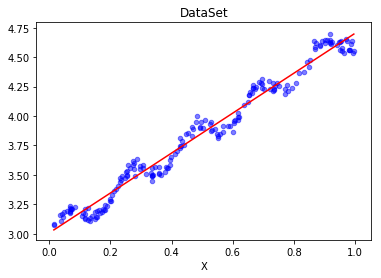

In [14]:
plotRegression()

如何判断拟合曲线的拟合效果的如何呢？当然，我们可以根据自己的经验进行观察，除此之外，我们还可以使用corrcoef方法，来比较预测值和真实值的相关性。编写代码如下：



In [15]:
 xArr, yArr = loadDataSet('ex0.txt')                                    #加载数据集
ws = standRegres(xArr, yArr)                                        #计算回归系数
xMat = np.mat(xArr)                                                    #创建xMat矩阵
yMat = np.mat(yArr)                                                    #创建yMat矩阵
yHat = xMat * ws
print(np.corrcoef(yHat.T, yMat))

[[1.         0.98647356]
 [0.98647356 1.        ]]


可以看到，对角线上的数据是1.0，因为yMat和自己的匹配是完美的，而YHat和yMat的相关系数为0.98。

最佳拟合直线方法将数据视为直线进行建模，具有十分不错的表现。数据当中似乎还存在其他的潜在模式。那么如何才能利用这些模式呢？我们可以根据数据来局部调整预测，下面就会介绍这种方法。

# 局部加权线性回归

线性回归的一个问题是有可能出现欠拟合现象，因为它求的是具有小均方误差的无偏估 计。显而易见，如果模型欠拟合将不能取得好的预测效果。所以有些方法允许在估计中引入一 些偏差，从而降低预测的均方误差。

其中的一个方法是局部加权线性回归（Locally Weighted Linear Regression，LWLR）。在该方法中，我们给待预测点附近的每个点赋予一定的权重。与kNN一样，这种算法每次预测均需要事先选取出对应的数据子集。

LWLR使用"核"（与支持向量机中的核类似）来对附近的点赋予更高的权重。核的类型可以自由选择，最常用的核就是高斯核，

In [17]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
def loadDataSet(fileName):
    """
    函数说明:加载数据
    Parameters:
        fileName - 文件名
    Returns:
        xArr - x数据集
        yArr - y数据集
    Website:https://www.cuijiahua.com/
    Modify:
        2017-11-12
    """
    numFeat = len(open(fileName).readline().split('\t')) - 1
    xArr = []; yArr = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        xArr.append(lineArr)
        yArr.append(float(curLine[-1]))
    return xArr, yArr
 
def plotlwlrRegression():
    """
    函数说明:绘制多条局部加权回归曲线
    Parameters:
        无
    Returns:
        无
    Website:https://www.cuijiahua.com/
    Modify:
        2017-11-15
    """
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    xArr, yArr = loadDataSet('ex0.txt')                                    #加载数据集
    yHat_1 = lwlrTest(xArr, xArr, yArr, 1.0)                            #根据局部加权线性回归计算yHat
    yHat_2 = lwlrTest(xArr, xArr, yArr, 0.01)                            #根据局部加权线性回归计算yHat
    yHat_3 = lwlrTest(xArr, xArr, yArr, 0.003)                            #根据局部加权线性回归计算yHat
    xMat = np.mat(xArr)                                                    #创建xMat矩阵
    yMat = np.mat(yArr)                                                    #创建yMat矩阵
    srtInd = xMat[:, 1].argsort(0)                                        #排序，返回索引值
    xSort = xMat[srtInd][:,0,:]
    fig, axs = plt.subplots(nrows=3, ncols=1,sharex=False, sharey=False, figsize=(10,8))                                        
    axs[0].plot(xSort[:, 1], yHat_1[srtInd], c = 'red')                        #绘制回归曲线
    axs[1].plot(xSort[:, 1], yHat_2[srtInd], c = 'red')                        #绘制回归曲线
    axs[2].plot(xSort[:, 1], yHat_3[srtInd], c = 'red')                        #绘制回归曲线
    axs[0].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[1].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[2].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0].set_title(u'局部加权回归曲线,k=1.0',FontProperties=font)
    axs1_title_text = axs[1].set_title(u'局部加权回归曲线,k=0.01',FontProperties=font)
    axs2_title_text = axs[2].set_title(u'局部加权回归曲线,k=0.003',FontProperties=font)
    plt.setp(axs0_title_text, size=8, weight='bold', color='red')  
    plt.setp(axs1_title_text, size=8, weight='bold', color='red')  
    plt.setp(axs2_title_text, size=8, weight='bold', color='red')  
    plt.xlabel('X')
    plt.show()
def lwlr(testPoint, xArr, yArr, k = 1.0):
    """
    函数说明:使用局部加权线性回归计算回归系数w
    Parameters:
        testPoint - 测试样本点
        xArr - x数据集
        yArr - y数据集
        k - 高斯核的k,自定义参数
    Returns:
        ws - 回归系数
    Website:https://www.cuijiahua.com/
    Modify:
        2017-11-15
    """
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m)))                                        #创建权重对角矩阵
    for j in range(m):                                                  #遍历数据集计算每个样本的权重
        diffMat = testPoint - xMat[j, :]                                 
        weights[j, j] = np.exp(diffMat * diffMat.T/(-2.0 * k**2))
    xTx = xMat.T * (weights * xMat)                                        
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))                            #计算回归系数
    return testPoint * ws
def lwlrTest(testArr, xArr, yArr, k=1.0):  
    """
    函数说明:局部加权线性回归测试
    Parameters:
        testArr - 测试数据集
        xArr - x数据集
        yArr - y数据集
        k - 高斯核的k,自定义参数
    Returns:
        ws - 回归系数
    Website:
https://www.cuijiahua.com/
    Modify:
        2017-11-15
    """
    m = np.shape(testArr)[0]                                            #计算测试数据集大小
    yHat = np.zeros(m)    
    for i in range(m):                                                    #对每个样本点进行预测
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

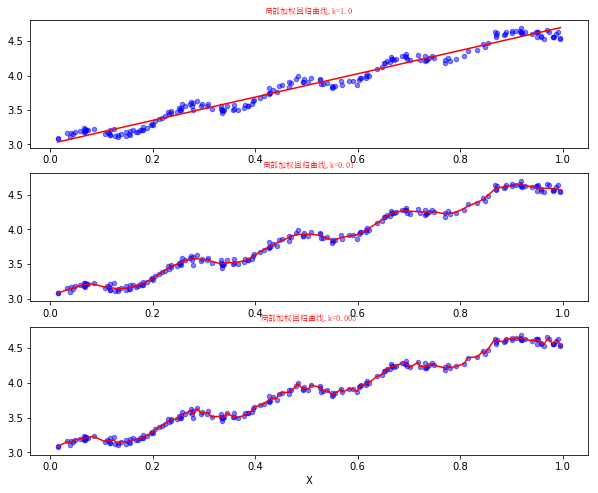

In [18]:
plotlwlrRegression()

可以看到，当k越小，拟合效果越好。但是当k过小，会出现过拟合的情况，例如k等于0.003的时候。

